In [170]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [124]:
stats_df = pd.read_excel("nba_2021_22.xlsx")

# List of all statistics in the dataset
print(stats_df.columns)

stats_df.head()

Index(['TEAM', 'PLAYOFFS', 'AGE', 'W', 'L', 'FG', 'FGA', 'FG RATE', '3P',
       '3PA', '3P RATE', '2P', '2PA', '2P RATE', 'FT', 'FTA', 'FT RATE', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ORTG', 'DRTG',
       'PACE', 'FTR', '3PAR', 'TS', 'OFF EFG', 'OFF TOV', 'OFF ORB',
       'OFF FT/FGA', 'DEF EFG', 'DEF TOV', 'DEF DRB', 'DEF FT/FGA', 'DIST',
       'LAYUP FREQ', 'CORNER FREQ', 'CORNER RATE'],
      dtype='object')


,TEAM,PLAYOFFS,AGE,W,L,FG,FGA,FG RATE,3P,3PA,...,OFF ORB,OFF FT/FGA,DEF EFG,DEF TOV,DEF DRB,DEF FT/FGA,DIST,LAYUP FREQ,CORNER FREQ,CORNER RATE
0,Atlanta Hawks,Made Playoffs,26.1,43,39,41.5,88.3,0.470,12.9,34.4,...,23.0,0.205,0.543,11.5,76.9,0.177,14.5,0.293,0.221,0.426
1,Boston Celtics,Made Final Four,26.1,51,31,40.7,87.4,0.466,13.2,37.1,...,24.0,0.195,0.502,12.5,77.3,0.183,14.8,0.334,0.231,0.389
2,Brooklyn Nets,Made Playoffs,29.1,44,38,42.0,88.4,0.475,11.5,31.7,...,23.9,0.198,0.521,11.7,75.1,0.201,13.9,0.304,0.235,0.393
3,Charlotte Hornets,Missed Playoffs,25.5,43,39,42.8,91.4,0.468,13.9,38.2,...,23.3,0.173,0.544,13.1,74.8,0.187,13.8,0.297,0.273,0.418
4,Chicago Bulls,Made Playoffs,26.3,46,36,41.7,86.9,0.480,10.6,28.8,...,20.4,0.201,0.541,11.9,78.3,0.199,13.9,0.364,0.287,0.372


In [125]:
# To see what a stat means, use the following dictionary:

df = pd.read_excel("Statistic Descriptions.xlsx")

stats_descriptions = df.set_index("Statistic").to_dict()['Description']

# Example: what does the "playoffs" stat mean
print(stats_descriptions['PLAYOFFS'] + '\n')

# Example: what does the "ORTG" stat mean
print(stats_descriptions['ORTG'])

0 if team missed playoffs, 1 if team made playoffs, 2 if team made conference finals (last 4 teams), 3 if team won finals

Offensive rating (estimated number of points scored per 100 possessions, higher is better)


**Example Analysis:** Show that there is a strong correlation between winning and a team's offensive rating (average points scored in 100 possessions) minus a team's defensive rating (average points allowed in 100 possessions), including each team's playoff status.

In [144]:
# Use this color dictionary for all graphs to differentiate based on each team's playoff status
colors = {'Missed Playoffs' : 'brown', 'Made Playoffs' : 'blue', 'Made Final Four' : 'green', 'Won Finals' : 'red'}

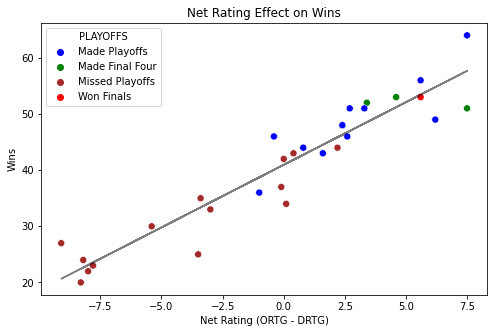

R-squared: 0.8946227362831126


In [173]:
# Make a new dataframe that has all of the data we need for the graph.
df = stats_df.copy()[["TEAM", "W", "PLAYOFFS"]]
df['Net Rating'] = stats_df['ORTG'] - stats_df['DRTG']

# Create a new matplotlib figure and use seaborn to create the scatterplot.
plt.figure(figsize = (8, 5))
scatter = sns.scatterplot(x = 'Net Rating', y = 'W', data = df, hue = "PLAYOFFS", palette = colors, s = 50)
scatter.set(title = 'Net Rating Effect on Wins', xlabel = 'Net Rating (ORTG - DRTG)', ylabel = "Wins")

# Use Scikit-learn to create a linear regression model, and add it to the plot.
x = df['Net Rating'].values.reshape(-1, 1)
y = df['W'].values
model = LinearRegression().fit(x, y)
plt.plot(x, model.predict(x), color = 'black', alpha = 0.5)

plt.show()

# Calculate r^2 for the model:
print(f'R-squared: {r2_score(y, model.predict(x))}')

As we can see, there is a very strong correlation between a team's net rating and number of wins, with an r^2 value of 0.895. This is to be expected, as a team that scores more points than it allows will win a lot of games, and vice versa.

This trend also carried over to the playoffs. With a few exceptions, teams with bad net ratings missed the playoffs, and teams with good net ratings made the playoffs. All teams that made a deep playoff run had great net ratings.

We can see this in table form below:

In [190]:
df[['TEAM', 'PLAYOFFS', "Net Rating"]].sort_values("Net Rating", ascending = False).reset_index(drop = True)

,TEAM,PLAYOFFS,Net Rating
0,Phoenix Suns,Made Playoffs,7.5
1,Boston Celtics,Made Final Four,7.5
2,Utah Jazz,Made Playoffs,6.2
3,Memphis Grizzlies,Made Playoffs,5.6
4,Golden State Warriors,Won Finals,5.6
5,Miami Heat,Made Final Four,4.6
6,Dallas Mavericks,Made Final Four,3.4
7,Milwaukee Bucks,Made Playoffs,3.3
8,Philadelphia 76ers,Made Playoffs,2.7
9,Minnesota Timberwolves,Made Playoffs,2.6
